# PyImageSearch Practice File - Image Processing Basics
https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/ -> link of tutorial

https://www.pyimagesearch.com/start-here/ -> link of home page

In [8]:
# import the necessary packages
import imutils
import cv2
import matplotlib.pyplot as plt

In [3]:
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)

In [9]:
image = cv2.imread('../OpenCV_Basics/practice_image_1.jpg')

In [5]:
type(image)

numpy.ndarray

In [6]:
image.shape

(384, 600, 3)

In [7]:
h,w,d = image.shape

In [8]:
# width is the x-axis measurement - also known as columns
# height is the y-axis measurement - also known as rows
# depth denotes the color channels of the image, 3 means RGB channels.
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=384, depth=3


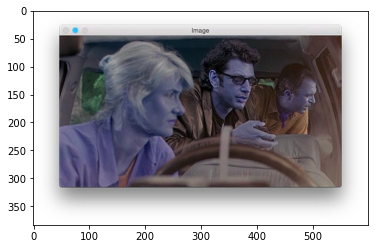

In [9]:
# displaying the image with matplotlib
# BGR image
plt.imshow(image)

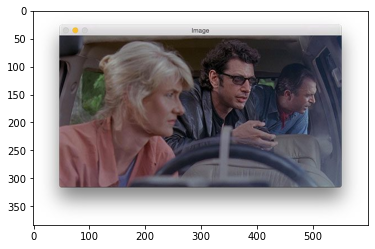

In [10]:
# displaying the image with matplotlib
# RGB image
RGB_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)

In [10]:
# displaying with OpenCV, this will create a separate window to display
#waitKey(0) will display the window infinitely until any keypress (it is suitable for image display).
cv2.imshow("Image", image)
cv2.waitKey(0)

-1

# Accessing individual pixels and its RGB values

In [15]:
# Pixels of an image is calculated by width*height values or x*y values
# the number of pixels in this image is
w*h 

230400

In [16]:
# each pixel of this image has some values for all three color channels RGB
# ranging from 0 to 255, in the form of a tuple
# accessing a random pixel and grabbing its BGR value
# its BGR since we are working on the non - transformed image
image[100,50]

array([19, 20, 24], dtype=uint8)

In [18]:
(B, G, R) = image[100,50]
print("R={}, G={}, B={}".format(R, G, B))

R=24, G=20, B=19


# ROI - Region Of Interest

In [19]:
# In simple words ROI means cropping the image--
#--accesing only the part of the image, which we want.
# Its done by array slicing.

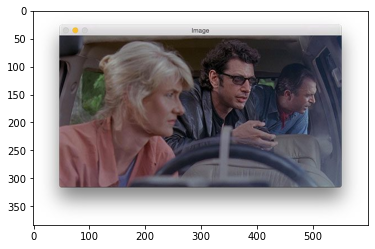

In [20]:
plt.imshow(RGB_image)

In [21]:
# image[startY:endY, startX:endX]
roi = RGB_image[50:190,300:400]

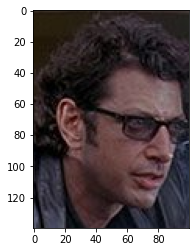

In [22]:
plt.imshow(roi)

# Resizing images

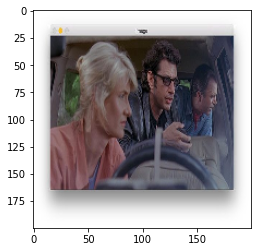

In [24]:
# This image is of size 600 x 384
# Let’s resize our original image to 200 x 200 pixels
resized_image = cv2.resize(RGB_image,(200,200))
plt.imshow(resized_image)

we have resized the RGB_image ignoring aspect ratio.the image is resized but is now distorted because we didn’t take into account the aspect ratio.

## Resizing with aspect ratio

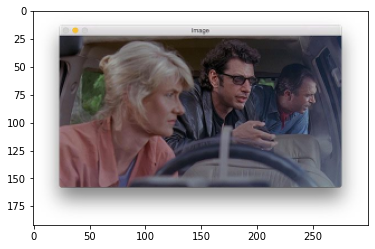

In [28]:
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(RGB_image, dim)
plt.imshow(resized)

In [30]:
RGB_image.shape

(384, 600, 3)

In [29]:
resized.shape

(192, 300, 3)

In [34]:
# Raion of width:height
width_ratio = w/h
width_ratio

1.5625

In [33]:
height_ratio = h/w
height_ratio

0.64

In [35]:
# So the aspect ratio is 1.5625 : 0.64 (width:height)

let's resize the width
to be 300px but compute the new height based on the aspect ratio

In [39]:
new_width = 300
new_height = new_width*height_ratio
new_height

192.0

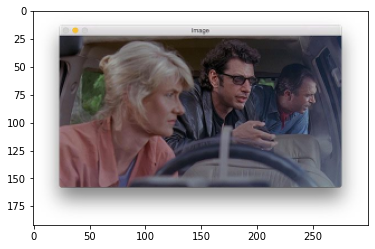

In [41]:
# we can't use float values, as the dtype of the image array is in integer.
resized_image_1 = cv2.resize(RGB_image,(300,192))
plt.imshow(resized_image_1)

Resizing images while maintaining aspect ratio with OpenCV is a three-step process: (1) extract the image dimensions, (2) compute the aspect ratio, and (3) resize the image (cv2.resize) along one dimension and multiply the other dimension by the aspect ratio.

# Resizing using the imutils library

manually computing the aspect ratio can be a pain so let's use the imutils library instead, which does the calculations for us

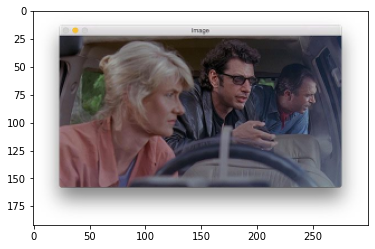

In [42]:
resized_image_2 = imutils.resize(RGB_image, width=300)
plt.imshow(resized_image_2)

# Rotating an image

Rotating an image with OpenCV about the center point requires three steps: (1) compute the center point using the image width and height, (2) compute a rotation matrix with cv2.getRotationMatrix2D, and (3) use the rotation matrix to warp the image with cv2.warpAffine.

Now let’s perform the same operation in just a single line of code using imutils

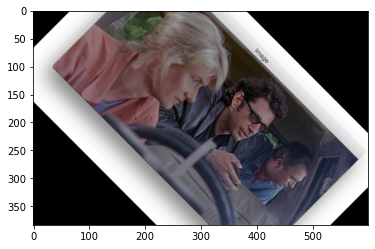

In [47]:
# The -45 means that we’ll rotate the image 45 degrees clockwise
rotated_image = imutils.rotate(RGB_image,-45)
plt.imshow(rotated_image)

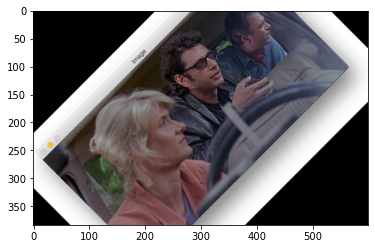

In [48]:
#The 45 means that we’ll rotate the image 45 degrees counter clockwise
rotated_image = imutils.rotate(RGB_image,45)
plt.imshow(rotated_image)

positive angles are counterclockwise and negative angles are clockwise.

In [51]:
# If we see the above results , the image doesn't fit in the frame
# so we can alter that and view the whole image by using imultils.rotate_bound

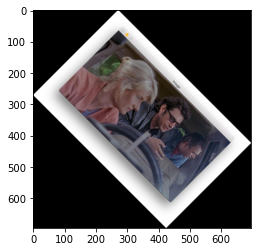

In [50]:
rotated = imutils.rotate_bound(RGB_image, 45)
plt.imshow(rotated)

# Smoothing or blurring an image

#apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
#useful when reducing high frequency noise

Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images.

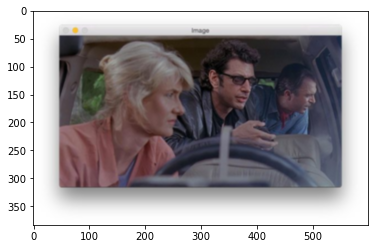

In [55]:
# small kernel
blurred = cv2.GaussianBlur(RGB_image, (5, 5), 0)
plt.imshow(blurred)

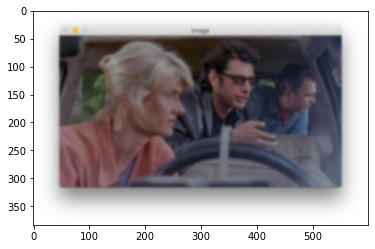

In [56]:
# large kernel
blurred = cv2.GaussianBlur(RGB_image, (11, 11), 0)
plt.imshow(blurred)

# Drawing on an image

we’re going to draw a rectangle, circle, and line on an input image. We’ll also overlay text on an image as well.

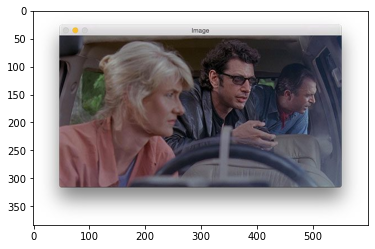

In [11]:
plt.imshow(RGB_image)

 draw a 2px thick red rectangle surrounding the face

In [16]:
# making a copy of the image , since this operation does inplace changes on the image
rgb_copy = RGB_image.copy()

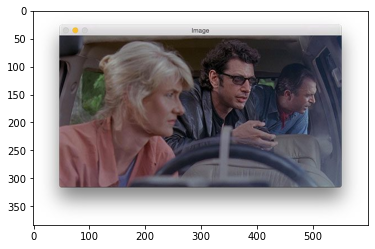

In [17]:
plt.imshow(rgb_copy)

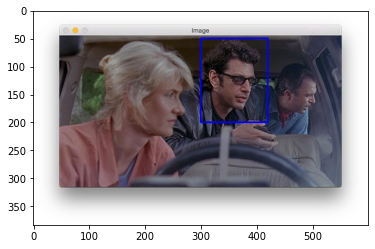

In [18]:
rgb_copy = RGB_image.copy()
cv2.rectangle(rgb_copy,(300,200),(420,50),[0,0,255],2)
plt.imshow(rgb_copy)

let’s place a solid blue circle in front of the face:

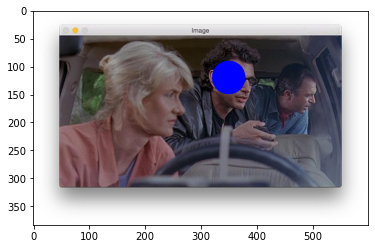

In [23]:
rgb_copy = RGB_image.copy()
cv2.circle(rgb_copy,(350,120),30,[0,0,255],-1)
plt.imshow(rgb_copy)

draw a 5px thick red line 

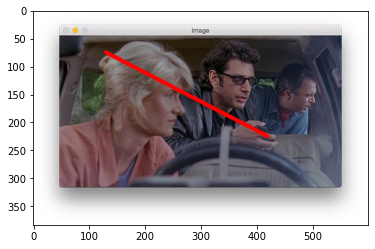

In [25]:
rgb_copy = RGB_image.copy()
cv2.line(rgb_copy,(130,75),(420,225),[255,0,0],5)
plt.imshow(rgb_copy)

draw green text on the image

The putText function of OpenCV is responsible for drawing text on an image. Let’s take a look at the required parameters:

img : The output image.
text : The string of text we’d like to write/draw on the image.
pt : The starting point for the text.
font : I often use the cv2.FONT_HERSHEY_SIMPLEX .
scale : Font size multiplier.
color : Text color.
thickness : The thickness of the stroke in pixels.

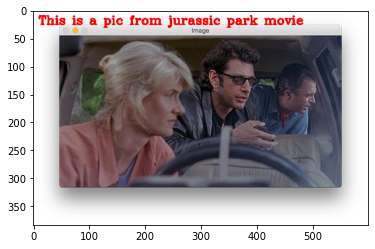

In [26]:
rgb_copy = RGB_image.copy()
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(rgb_copy,"This is a pic from jurassic park movie",(10,25),font,0.7,[255,0,0],2)
plt.imshow(rgb_copy)

# Counting Objects using contours

# Converting an image to grayscale

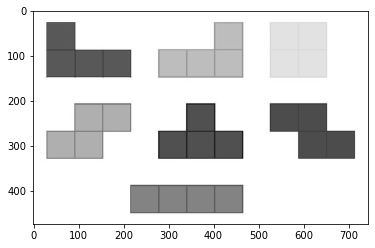

In [37]:
image = cv2.imread('../OpenCV_Basics/tetris_block.jpg')
grayimage = image.copy()
grayimage = cv2.cvtColor(grayimage,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimage, cmap = "gray")

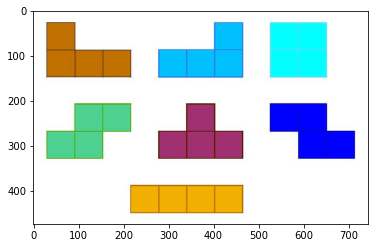

In [35]:
plt.imshow(image)

# Edge detection

Finding edges in an image using the Canny algorithm

We provide three parameters to the cv2.Canny function:

img : The gray image.
minVal : A minimum threshold, in our case 30 .
maxVal : The maximum threshold which is 150 in our example.
aperture_size : The Sobel kernel size. By default this value is 3 
Different values for the minimum and maximum thresholds will return different edge maps.

In [43]:
grayimage.min()

0

In [44]:
grayimage.max()

255

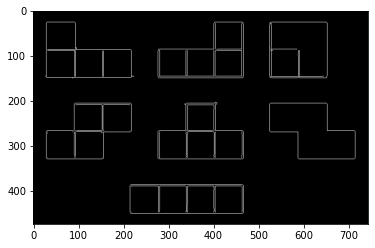

In [55]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(grayimage, 30, 150,3)
plt.imshow(edged, cmap = 'gray')

# Thresholding

Image thresholding is an important intermediary step for image processing pipelines. Thresholding can help us to remove lighter or darker regions and contours of images.

Segmenting foreground from background with a binary image is critical to finding contours

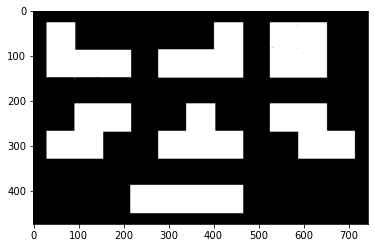

In [83]:
thr,thres_image = cv2.threshold(grayimage,227,255,cv2.THRESH_BINARY_INV)
plt.imshow(thres_image, cmap = 'gray')

# Detecting and drawing contours

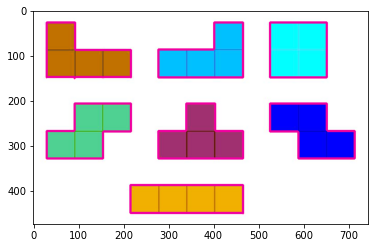

In [95]:
# making of copy of thres_image
thres_image_copy = thres_image.copy()
# finding contours on the thres_image_copy image
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thres_image_copy, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# grabbing the contours(outlines of the foreground)
cnts = imutils.grab_contours(cnts)

# making a copy of the original coloured image
image_copy = image.copy()

# loop over the contours
for c in cnts:
    
# draw each contour on the output image with a 3px thick purple
# outline, then display the output contours one at a time

    cv2.drawContours(image_copy, [c], -1, (240, 0, 159), 4)
    plt.imshow(image_copy)

In [85]:
len(cnts)

8